### Deliverable 1: Preprocessing the Data for a Neural Network

In [137]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [138]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME', 'ORGANIZATION'], axis=1, inplace=True)
application_df.shape

(34299, 9)

In [139]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique(dropna = True)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [140]:
#application_df[~application_df.INCOME_AMT.values
#application_df['INCOME_AMT'].drop_duplicates
application_df = application_df.loc[application_df['INCOME_AMT'] != "0"]
#application_df_filtered.to_csv('file1.csv')
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,1,1-9999,N,108590,1
3,T3,CompanySponsored,C2000,Preservation,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,1,10M-50M,N,7508025,1


In [141]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     8412
T6      406
T5      314
T4      265
T9      146
T7      130
T8       87
T19      81
T10      24
T12      14
T13      12
T2        9
T14       3
T25       3
T29       2
T15       2
T17       1
Name: APPLICATION_TYPE, dtype: int64

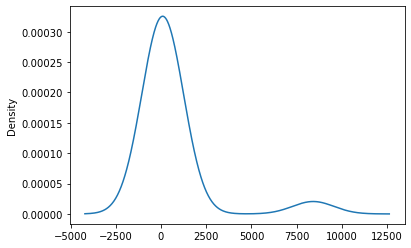

In [142]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
import matplotlib.pyplot as plot
application_counts.plot.density()

In [143]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_counts[application_counts < 130].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       8412
T6        406
T5        314
T4        265
Other     238
T9        146
T7        130
Name: APPLICATION_TYPE, dtype: int64

In [144]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    5645
C2000    1637
C1200    1078
C3000     456
C2100     339
C7000     325
C4000      89
C1700      79
C2700      37
C2800      37
C1270      32
C1300      19
C7100      15
C7200      13
C1400      12
C1800      12
C1500      11
C5000      10
C7120      10
C8000       7
C1240       7
C1280       4
C2300       4
C7210       3
C4100       2
C2710       2
C8200       2
C2400       2
C1250       2
C1238       2
C2570       1
C0          1
C5200       1
C1820       1
C3200       1
C2561       1
C1900       1
C6000       1
C1234       1
C1245       1
C1237       1
C2170       1
C1257       1
C1230       1
C8210       1
C1600       1
C1235       1
C1256       1
Name: CLASSIFICATION, dtype: int64

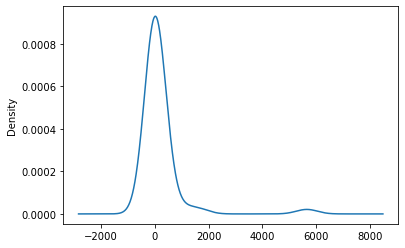

In [145]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
import matplotlib.pyplot as plot
classification_counts.plot.density()

In [146]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 325].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    5645
C2000    1637
C1200    1078
C3000     456
Other     431
C2100     339
C7000     325
Name: CLASSIFICATION, dtype: int64

In [147]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = ['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION', 'USE_CASE', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_df[application_cat]

,APPLICATION_TYPE,CLASSIFICATION,AFFILIATION,USE_CASE,INCOME_AMT,SPECIAL_CONSIDERATIONS
1,T3,C2000,Independent,Preservation,1-9999,N
3,T3,C2000,CompanySponsored,Preservation,10000-24999,N
4,T3,C1000,Independent,Heathcare,100000-499999,N
6,T3,C1000,Independent,Preservation,100000-499999,N
7,T3,C2000,Independent,Preservation,10M-50M,N
...,...,...,...,...,...,...
34284,T3,C1000,CompanySponsored,Preservation,1M-5M,N
34287,T3,C1200,Independent,Preservation,25000-99999,N
34289,T3,C1000,Independent,Preservation,25000-99999,N
34290,T4,C3000,CompanySponsored,Preservation,1-9999,N


In [148]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
list(encode_df.columns)

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T9',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_C7000',
 'CLASSIFICATION_Other',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y']

In [149]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
encode_df = encode_df.merge(application_df, left_index=True,right_index=True,suffixes=(False, False)).drop(application_cat, axis=1)

In [150]:
df = encode_df[['STATUS','ASK_AMT','IS_SUCCESSFUL','APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y']]
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
1,1,108590,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,1,7508025,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [152]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [165]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
len(X_train.columns)
number_input_features = len(X_train.columns)
#number_hidden_nodes = number_input_features * 3
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 20

nn.add(
    tf.keras.layers.Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1 ,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 105)               3780      
_________________________________________________________________
dense_15 (Dense)             (None, 20)                2120      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [166]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt2/",exist_ok=True)
checkpoint_path = "checkpoints_opt2/weights.{epoch:02d}.hdf5"

In [167]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [168]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000)

In [169]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
65/65 [==============================] - 0s 796us/step - loss: 49331.5430 - accuracy: 0.4868
Epoch 2/100
65/65 [==============================] - 0s 888us/step - loss: 33919.0273 - accuracy: 0.4656
Epoch 3/100
65/65 [==============================] - 0s 771us/step - loss: 43423.3281 - accuracy: 0.4594
Epoch 4/100
65/65 [==============================] - 0s 786us/step - loss: 32793.0352 - accuracy: 0.4560
Epoch 5/100
65/65 [==============================] - 0s 800us/step - loss: 8248.2676 - accuracy: 0.5022
Epoch 6/100
65/65 [==============================] - 0s 840us/step - loss: 6917.6401 - accuracy: 0.5137
Epoch 7/100
65/65 [==============================] - 0s 858us/step - loss: 7249.2109 - accuracy: 0.5248
Epoch 8/100
65/65 [==============================] - 0s 809us/step - loss: 68117.1172 - accuracy: 0.4425
Epoch 9/100
65/65 [==============================] - 0s 814us/step - loss: 30649.7773 - accuracy: 0.4608
Epoch 10/100
65/65 [==============================] - 0s 8

65/65 [==============================] - 0s 932us/step - loss: 12337.5908 - accuracy: 0.4031
Epoch 78/100
65/65 [==============================] - 0s 926us/step - loss: 11171.6045 - accuracy: 0.4007
Epoch 79/100
65/65 [==============================] - 0s 761us/step - loss: 4918.2217 - accuracy: 0.4738
Epoch 80/100
65/65 [==============================] - 0s 825us/step - loss: 5747.7852 - accuracy: 0.4752
Epoch 81/100
65/65 [==============================] - 0s 835us/step - loss: 11033.6143 - accuracy: 0.3877
Epoch 82/100
65/65 [==============================] - 0s 1ms/step - loss: 3618.0137 - accuracy: 0.5589
Epoch 83/100
65/65 [==============================] - 0s 786us/step - loss: 6687.2964 - accuracy: 0.4281
Epoch 84/100
65/65 [==============================] - 0s 756us/step - loss: 1105.9152 - accuracy: 0.5556
Epoch 85/100
65/65 [==============================] - 0s 791us/step - loss: 6565.0464 - accuracy: 0.4844
Epoch 86/100
65/65 [==============================] - 0s 760us/step

In [170]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

22/22 - 0s - loss: 2.2513 - accuracy: 0.5893
Loss: 2.2512712478637695, Accuracy: 0.589337170124054


In [431]:
nn.save("trained_attrition_opt1.h5")